# Exploratory Data Analysis on Netflix data

In [1]:
# Import necessary linraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob

### Data Loading and Basic Exploration

In [2]:
# Read the Netflix dataset
dff=pd.read_csv('netflix_titles.csv')

In [3]:
dff


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
# Displaying the shape of the dataset
dff.shape

(8807, 12)

In [5]:
# Basic information about the dataset
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Statistical summary of the release years
dff.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# Check for missing values
dff.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Data Visualization

####  Visualizing the content type, and their ratings

In [3]:
# Defining custom colors for visualizations
colors = ['#2B2730', '#F11A7B', '#982176', '#3E001F', '#060047', '#B3005E', '#E90064', '#FF5F9E', '#9575CD', '#E57373']

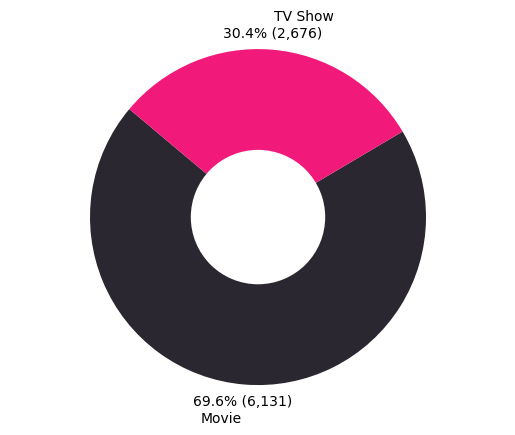

In [4]:
# Creating a pie chart for content types (Movies vs. TV Shows)
labels = dff['type'].value_counts().index
sizes = dff['type'].value_counts().values

plt.pie(sizes, labels=labels, colors=colors, startangle=140, pctdistance=1.1, labeldistance=1.2, autopct=lambda p: '{:.1f}% ({:,.0f})'.format(p, (p/100) * sizes.sum()))
circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.axis('equal')
plt.show()

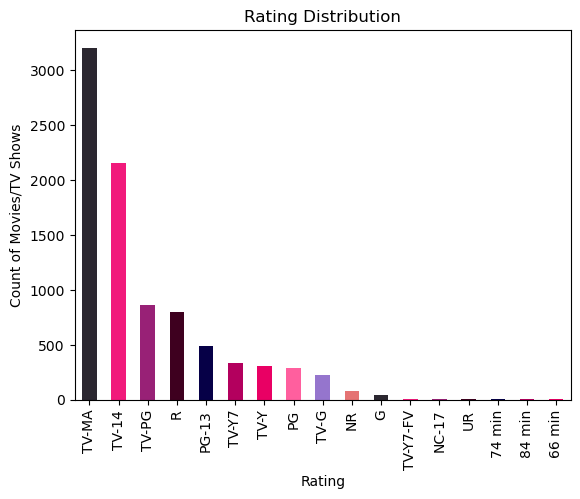

In [5]:
# Bar chart for rating distribution
rating = dff['rating'].value_counts()
rating.plot(kind='bar', color=colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count of Movies/TV Shows')
plt.show()

#### Analyzing the number of TV shows and Movies released by year

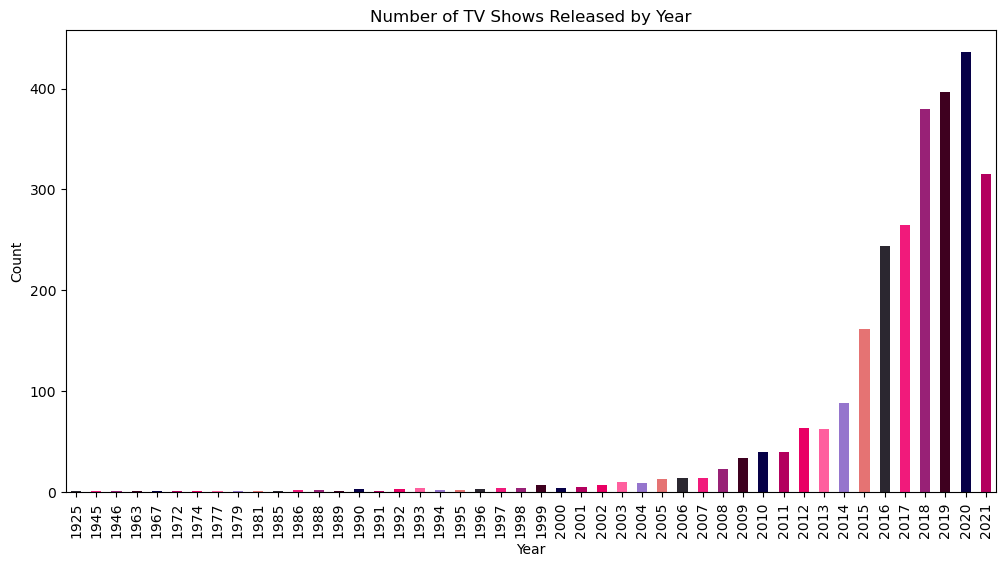

In [6]:
# Analyzing TV shows released by year
tv_shows = dff[dff['type'] == 'TV Show']
tv_shows_by_year = tv_shows['release_year'].value_counts().sort_index()
tv_shows_by_year.plot(kind='bar', figsize=(12, 6), color=colors)
plt.title('Number of TV Shows Released by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

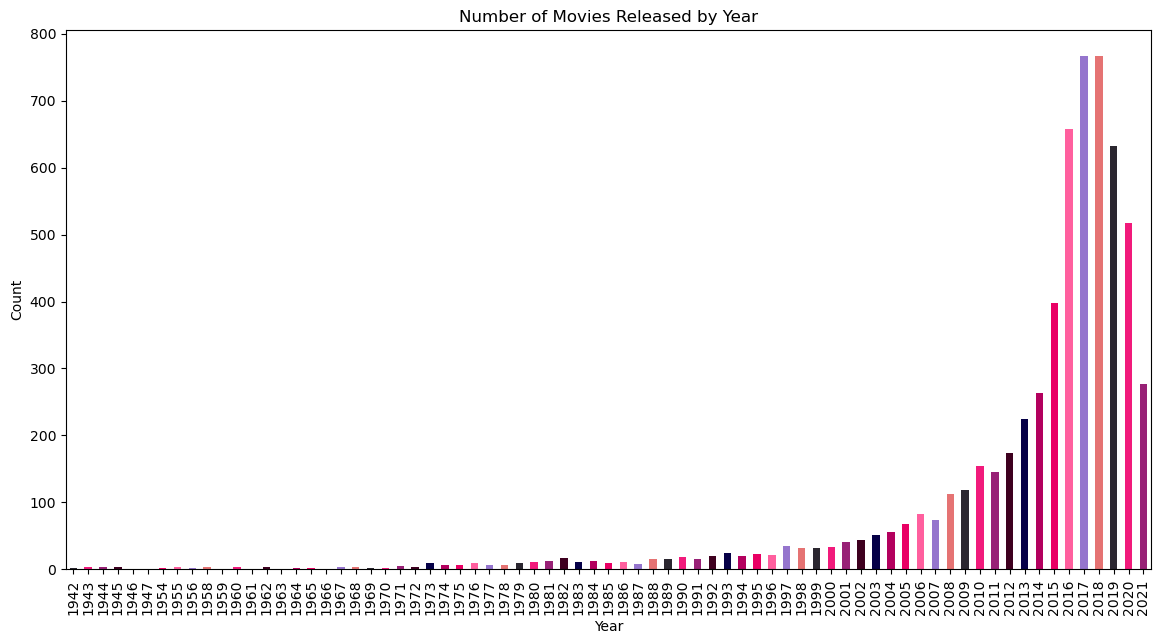

In [7]:
# Analyzing movies released by year
movies = dff[dff['type'] == 'Movie']
movies_by_year = movies['release_year'].value_counts().sort_index()
movies_by_year.plot(kind='bar', figsize=(14, 7), color=colors)
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### Visualizing the Top 10 Countries with most releases on Netflix

In [8]:
# Fill missing country values with 'Unknown'
dff['country'].fillna('Unknown', inplace=True)

# Extract individual countries from the 'country' column
countries_list = [country for sublist in dff['country'].str.split(',').tolist() for country in sublist]
countries_list = [country.strip() for country in countries_list]
unique_countries = [country for country in pd.Series(countries_list).unique() if country != 'Unknown']

In [9]:
# Finding the number of unique countries
len(unique_countries)

123

In [10]:
# Creating a dictionary to count country occurrences
dictionary = Counter([country for sublist in [i.replace(' ', '').split(',') for i in countries_list] for country in sublist])
dictionary

Counter({'UnitedStates': 3690,
         'India': 1046,
         'Unknown': 831,
         'UnitedKingdom': 806,
         'Canada': 445,
         'France': 393,
         'Japan': 318,
         'Spain': 232,
         'SouthKorea': 231,
         'Germany': 226,
         'Mexico': 169,
         'China': 162,
         'Australia': 160,
         'Egypt': 117,
         'Turkey': 113,
         'HongKong': 105,
         'Nigeria': 103,
         'Italy': 100,
         'Brazil': 97,
         'Argentina': 91,
         'Belgium': 90,
         'Indonesia': 90,
         'Taiwan': 89,
         'Philippines': 83,
         'Thailand': 70,
         'SouthAfrica': 62,
         'Colombia': 52,
         'Netherlands': 50,
         'Denmark': 48,
         'Ireland': 46,
         'Sweden': 42,
         'Singapore': 41,
         'Poland': 41,
         'UnitedArabEmirates': 37,
         'NewZealand': 33,
         'Lebanon': 31,
         'Israel': 30,
         'Norway': 30,
         'Chile': 29,
         'Russia'

In [11]:
# Getting the top 10 countries with the most releases
top_countries = dictionary.most_common(10)
country, releases = zip(*top_countries)

In [12]:
# Pie chart visualization for the top 10 countries
fig = go.Figure(data=[go.Pie(labels=country, values=releases, marker_colors=colors, pull=[0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0, 0.1, 0])])
fig.update_layout(title_text='Top 10 Countries with most releases on Netflix', width=800, height=400)
fig.show()

#### Top 5 Directors by Content

In [13]:
# Analyzing directors and their content
directors = dff['director'].fillna('No Director Specified').str.split(',', expand=True).stack()
directors = directors.to_frame().rename(columns={0:'Director'})
directors = directors.groupby('Director').size().reset_index(name='Total Content')
directors = directors[directors.Director != 'No Director Specified'].sort_values('Total Content', ascending=False)
top5_directors = directors.head().sort_values('Total Content')
fig = go.Figure(data=[go.Bar(x=top5_directors['Total Content'], y=top5_directors['Director'], orientation='h', marker_color=colors)])
fig.update_layout(title_text='Top 5 Directors on Netflix with respect to the Content', autosize=False)
fig.show()

#### Distribution of Movie Durations and TV Show Seasons

In [14]:
# Extract movies and TV shows dataframes
movies_df = dff[dff['type'] == 'Movie']
tv_shows_df = dff[dff['type'] == 'TV Show']

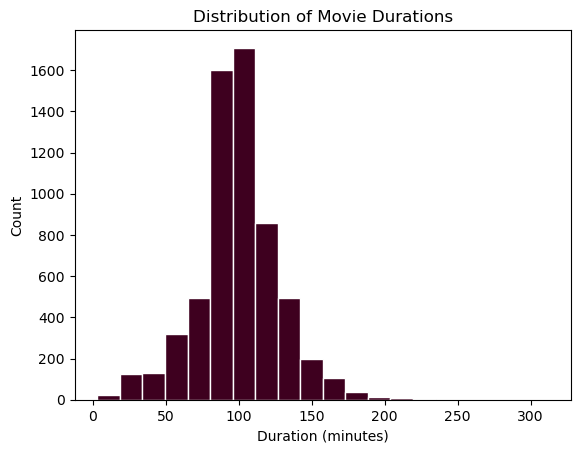

In [15]:
# Extract movie durations (in minutes)
movie_duration = movies_df['duration'].str.replace(' min', '').astype(float).dropna()

# Plotting a histogram for movie durations
plt.hist(movie_duration, bins=20, color=colors[3], edgecolor='white')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

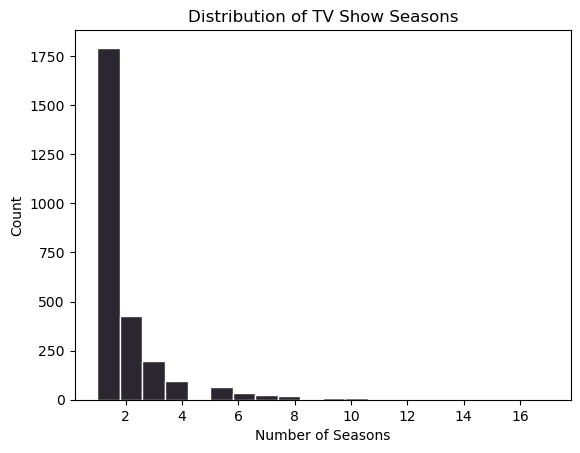

In [16]:
# Extract TV show durations (number of seasons)
tv_shows_duration = tv_shows_df['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(float).dropna()

# Plotting a histogram for TV show seasons
plt.hist(tv_shows_duration, bins=20, color=colors[0], edgecolor='white')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

#### Sentiment Analysis on the data

In [17]:
# Preparing data for sentimental analysis
dfx = dff[['release_year','description']]
dfx = dfx.rename(columns={'release_year':'Release Year'})

In [18]:
# Performing sentiment analysis on descriptions
for index,row in dfx.iterrows():
  z=row['description']
  testimonial=TextBlob(z)
  p=testimonial.sentiment.polarity
  if p==0:
     sent='Neutral'
  elif p>0:
     sent='Positive'
  else:
     sent='Negative'
  dfx.loc[[index,2],'Sentiment']=sent

In [24]:
# Group data by release year and sentiment
dfx = dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')
dfx = dfx[dfx['Release Year']>=2010]

# Creating a bar chart for sentiment of content on Netflix
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix", color_discrete_map={'Positive': colors[1], 'Neutral': colors[0], 'Negative': colors[4]})
fig4.show()